In [1]:
import tensorflow

C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\ten

In [2]:
tensorflow.__version__

'1.11.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r"C:\Users\etisalat\Desktop\Etisalat Main Folder\Training Materials\Deep Learning\Final material\dataset\reg.csv")

In [5]:
data.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [6]:
data.shape

(1000, 3)

### re-arange the columns

In [7]:
data=data[["feature1","feature2","price"]]

In [8]:
data.head()

,feature1,feature2,price
0,999.787558,999.766096,461.527929
1,998.861615,1001.042403,548.130011
2,1000.070267,998.844015,410.297162
3,999.952251,1000.440940,540.382220
4,1000.446011,1000.338531,546.024553


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002F9597B8>,
      dtype=object)

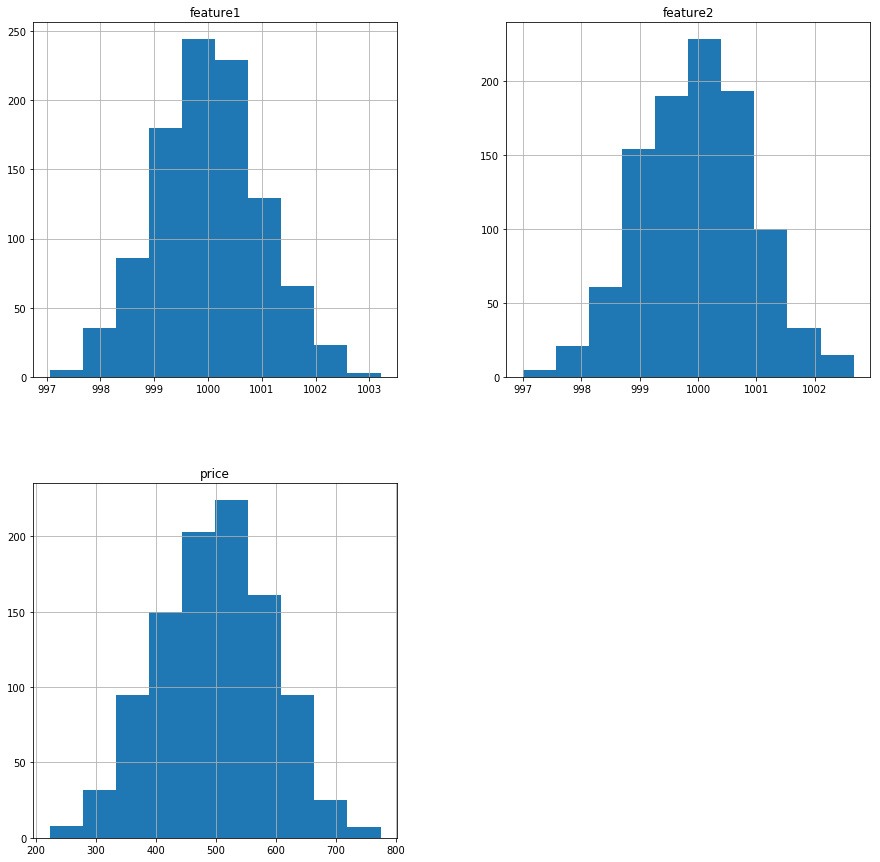

In [11]:
data.hist(figsize=(15,15))

### split x and y

In [12]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [13]:
x

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [14]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

### Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
scaler.fit(x)

MinMaxScaler()

In [19]:
x_scaled=scaler.transform(x)

In [20]:
x_scaled

array([[0.44380388, 0.4885581 ],
       [0.29323398, 0.71363026],
       [0.48977598, 0.32595231],
       ...,
       [0.7144056 , 0.32658556],
       [0.60372768, 0.27637009],
       [0.35350286, 0.78575664]])

### split training and testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.3,random_state=123)

In [24]:
xtrain.shape

(700, 2)

In [25]:
xtest.shape

(300, 2)

### Creating ANN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 1st way to create ANN model 

In [27]:
'''
model=Sequential([Dense(4,activation="relu") ,
                  Dense(2,activation="relu") ,
                  Dense(1) ])
'''           

'\nmodel=Sequential([Dense(4,activation="relu") ,\n                  Dense(2,activation="relu") ,\n                  Dense(1) ])\n'

## 2nd Way 

In [28]:
model=Sequential()
model.add(Dense(4,activation="relu")) # 1st HL with 4N and "relu" activation
model.add(Dense(2,activation="relu")) # 2nd HL with 2N and "relu" activation
model.add(Dense(1))# output layer with 1N

In [29]:
model.compile(optimizer="rmsprop",loss="mse") # choose the loss function and optimizer

In [31]:
model.fit(xtrain,ytrain,epochs=50,batch_size=1) # batch_size is how many row will pass during 1 epoch
# 1 epoch mean the full data will pass to the ANN algorithm 1 time only , if the batch_size = 1
# example : if the batch_size = 2 and 50 epoch mean for each epoch we will pass half of the data 

Epoch 1/50
700/700 [==============================] - 3s 4ms/step - loss: 257743.3761
Epoch 2/50
700/700 [==============================] - 2s 2ms/step - loss: 244946.4321
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 212535.0229
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 156747.5714
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 84199.0655
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 21697.3776
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 2064.6537
Epoch 8/50
700/700 [==============================] - 1s 2ms/step - loss: 1706.1283
Epoch 9/50
700/700 [==============================] - 2s 2ms/step - loss: 1615.8104
Epoch 10/50
700/700 [==============================] - 1s 2ms/step - loss: 1525.8130
Epoch 11/50
700/700 [==============================] - 2s 3ms/step - loss: 1449.8928
Epoch 12/50
700/700 [==============================] - 1s 2ms/st

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  12        
_________________________________________________________________
dense_1 (Dense)              multiple                  10        
_________________________________________________________________
dense_2 (Dense)              multiple                  3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.history.history["loss"]

[257743.37607142856,
 244946.43209263394,
 212535.02285714285,
 156747.57137834822,
 84199.06545026507,
 21697.377636130965,
 2064.6537462458173,
 1706.1282607866983,
 1615.810402104498,
 1525.8129518613193,
 1449.8927753645874,
 1368.3956112765934,
 1282.9169862468327,
 1200.5687246988766,
 1108.1536623508644,
 1019.4298996769211,
 946.1535282518821,
 862.6822078851238,
 782.2347930255638,
 698.2767389304404,
 619.70813844732,
 542.2012554491844,
 468.6626245897902,
 399.3404337152706,
 331.48931420003197,
 272.3562427434764,
 216.98441010015483,
 167.76010119481543,
 127.28168668462496,
 92.95789317923199,
 67.72801357407256,
 50.42639296446927,
 39.731542687248435,
 33.255349696096296,
 29.64243701402231,
 27.619530840662442,
 26.298524312170755,
 26.071458374599793,
 25.859038820273376,
 25.588343646382647,
 25.85384904667203,
 25.79530342940374,
 25.635521340227818,
 25.34835047338158,
 25.4616407132335,
 25.481611045025556,
 25.341748159510484,
 25.362897426141426,
 25.7634144873

In [44]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [45]:
plt.plot(model.history.history["loss"],marker="o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

### Evaluation

In [47]:
ypred=model.predict(xtest)

In [49]:
from sklearn.metrics import explained_variance_score

In [50]:
explained_variance_score(ytest,ypred)

0.9973715878588849

In [65]:
result=pd.DataFrame(ypred,columns=["ypred"])

In [66]:
result["ytest"]=ytest

In [67]:
result["error"]=result["ytest"]-result["ypred"]

In [69]:
result.head()

,ypred,ytest,error
0,346.337128,340.058142,-6.278986
1,509.866455,515.147540,5.281085
2,322.950653,325.058522,2.107869
3,552.288025,556.543976,4.255951
4,431.696716,442.172028,10.475312


### save ANN model

In [70]:
tensorflow.keras.models.save_model(model,"reg_model.h5")

### load the model

In [71]:
loaded_model=tensorflow.keras.models.load_model("reg_model.h5",compile=False)

In [73]:
user_input=scaler.transform([[999.787558,999.766096]])

In [74]:
user_input

array([[0.44380396, 0.48855806]])

In [79]:
loaded_model.predict(user_input)

array([[470.65427]], dtype=float32)